# Исследование рынка заведений общественного питания


**Автор:**  

Григорьев Павел


**Описание проекта:**   

В Москве открывается небольшое кафе. Оно оригинальное - гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Было принято решение привлечь инвесторов. Их интересует текущее положение дел на рынке. Необходимо подготовить исследование рынка. Полученные данные помогут понять, стоит ли вкладываться в этот проект. 

**Цель:**  

Оценить потенциал и рентабельность открытия кафе с обслуживанием роботами в Москве и предоставить инвесторам необходимую информацию для принятия обоснованного решения о финансировании проекта.

**Источники данных:**  

Открытые данные о заведениях общественного питания в Москве.

**Условия проведения анализа данных:**  


> указываем временной интервал выборки  
> Например, 'для анализ будут использоваться данные за год с 1 июня 2017 по 31 мая 2018 года'


> Например, 'для анализ будут использоваться данные за год с 1 июня 2017 по 31 мая 2018 года'


**Главные выводы:**  
тут помещаем самое главное из общего вывода, примерно до полустраницы, чтобы не было сильно много и при этом указать все главные выводы
Будет идеально, елси выводы на похожие темы будут рядом, то есть елси мы имеем несколько выводов о доходе, то лушче поместить их рядом

- Женщины чаще возвращают кредит, чем мужчины.
- Долги присутствуют у людей с разным доходом.


**Рекомендации:**

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.


## Загрузка библиотек <skip>

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import plotly.express as px
import pagri_data_tools  # type: ignore
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

## Описание и изучение данных


### Описание данных


- id - идентификатор объекта;
- object_name - название объекта общественного питания;
- chain - сетевой ресторан;
- object_type - тип объекта общественного питания;
- address - адрес;
- number - количество посадочных мест.

### Изучение данных


#### Изучение переменных


Загружаем данные и задаем типы данных для столбцов, где это возможно.

In [2]:
dtype = {'chain': 'category', 'object_type': 'category'}
df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv', dtype=dtype)
df.rename(columns={'object_name': 'name', 'object_type': 'type', 'chain': 'is_chain', 'number': 'seats'}, inplace=True)
df.sample(5, random_state=7)

,id,name,is_chain,type,address,seats
5138,26157,Ресторан Баку-Сити,нет,ресторан,"город Москва, улица Руставели, дом 14, строение 1",90
6247,29462,Школьно-базовая столовая,нет,столовая,"город Москва, улица Маршала Савицкого, дом 26,...",200
13182,204427,Поварская Лавка,нет,кафе,"город Москва, набережная Академика Туполева, д...",25
6798,27397,Столовая при школе 2097,нет,столовая,"город Москва, Светлогорский проезд, дом 7, кор...",124
3454,27013,Бега,нет,ресторан,"город Москва, Беговая аллея, дом 11",50


Изучим по отдельности каждый столбец.

In [3]:
gen = pagri_data_tools.info_gen(df)
gen.next()

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
15.37k,6,6,---,---


Values,15.37k (100%),,Max,223.44k,,Avg,119.72k,,151.63k <1%
Missing,---,,95%,215.24k,,Mode,---,,165.51k <1%
Distinct,15.37k (100%),,75%,184.26k,,Range,222.60k,,183.13k <1%
Duplicates,---,,50%,144.97k,,iQR,155.74k,,186.22k <1%
Zeros,---,,25%,28.52k,,std,73.04k,,180.67k <1%
Negative,---,,5%,21.44k,,kurt,-1.56,,180.17k <1%
RAM (Mb),<1 Mb,,Min,838.00,,skew,-0.23,,180.18k <1%

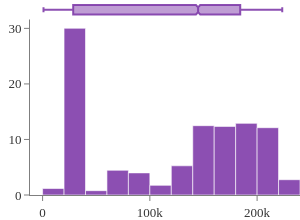

In [4]:
gen.next()

**Наблюдения:**  

- В идентификаторе объеката все значения уникальны.


Values,15.37k (100%),,Max,1.70k,,Avg,59.55,,0.00 (11%)
Missing,---,,95%,214.00,,Mode,0.00,,40.00 (5%)
Distinct,315.00 (2%),,75%,80.00,,Range,1.70k,,20.00 (5%)
Duplicates,15.05k (98%),,50%,40.00,,iQR,68.00,,30.00 (4%)
Zeros,1.62k (11%),,25%,12.00,,std,74.74,,10.00 (4%)
Negative,---,,5%,0.00,,kurt,51.66,,50.00 (4%)
RAM (Mb),<1 Mb,,Min,0.00,,skew,4.44,,60.00 (3%)

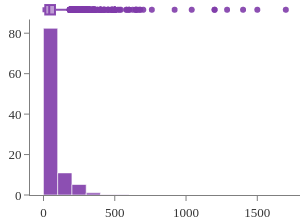
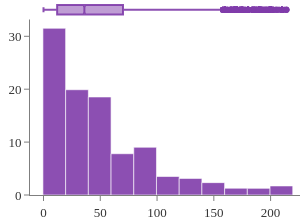

In [5]:
gen.next('dual')

**Наблюдения:**  

- В столбце с количеством посадочных мест присутствует 11% нулей.
- Количество посадочных мест варьируется от 0 до 1 700 мест.
- В основном количество посадочных мест находится в диапазоне от 12 до 80 мест.
- Максимальное количество посадочных мест 1700 это вполне может быть правдой. Это могут быть конференс залы или кафе в крупных торговых центрах.

Values,15.37k (100%),,Столовая (2%)
Missing,---,,Кафе (2%)
Distinct,10.39k (68%),,Шаурма (2%)
Duplicated origin,4.97k (32%),,KFC (1%)
Dupl (modify - origin),550.00 (8%),,Шоколадница <1%
Empty,---,,Макдоналдс <1%
RAM (Mb),2,,Бургер Кинг <1%

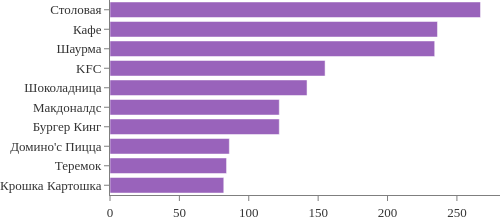

In [6]:
gen.next()

**Наблюдения:**  

- В столбце с названием объектов только 68 униальных значений. Значит присутствует достаточно объектов с одинаковыми названиями.
- Больше всего объектов с названием "Столовая", "Шаурма", "Кафе".
- Присутствуют неявные дубликаты в названиях объектов.


Чтобы исключить неявных дубликатов, переведем наименования в нижний регистр и удалить символы ',', '«', '»', '(', ')', '"', ' '.

In [7]:
df.name.nunique()

10393

In [8]:
df.name = pagri_data_tools.normalize_string_series(df.name, symbols = ['.', ',', '«', '»', '(', ')', '"', "'", "`"])
df.name.nunique()

9813

Values,15.37k (100%),,нет (81%)
Missing,---,,да (19%)
Distinct,2.00 (<1%),,
Duplicated origin,15.36k (99.9%),,
Dupl (modify - origin),---,,
Empty,---,,
RAM (Mb),<1 Mb,,

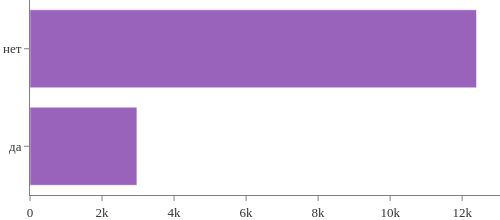

In [9]:
gen.next()

**Наблюдения:**  

- 81% объектов не является сетевыми ресторанами.


Values,15.37k (100%),,кафе (40%)
Missing,---,,столовая (17%)
Distinct,9.00 (<1%),,ресторан (15%)
Duplicated origin,15.36k (99.9%),,предприятие быстрого обслуживания (13%)
Dupl (modify - origin),---,,бар (6%)
Empty,---,,буфет (4%)
RAM (Mb),<1 Mb,,кафетерий (3%)

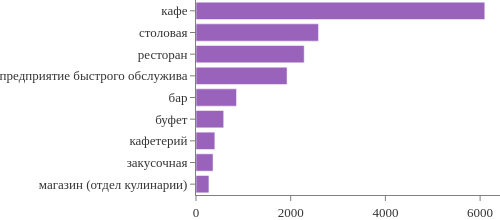

In [10]:
gen.next()

**Наблюдения:**  

- Больше всего объектов имеют тип кафе (40%).


Values,15.37k (100%),,"город Москва, Ходынский бульвар, дом 4 <1%"
Missing,---,,"город Москва, Пресненская набережная, дом 2 <1%"
Distinct,9.11k (59%),,"город Москва, проспект Мира, дом 211, корпус 2 <1%"
Duplicated origin,6.26k (41%),,"город Москва, Кировоградская улица, дом 13А <1%"
Dupl (modify - origin),---,,"город Москва, площадь Киевского Вокзала, дом 2 <1%"
Empty,---,,"город Москва, улица Земляной Вал, дом 33 <1%"
RAM (Mb),4,,"город Москва, Мытная улица, дом 74 <1%"

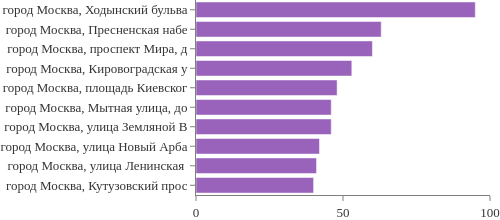

In [11]:
gen.next()

**Наблюдения:**  

- В колонке с адресом 59% уникальных значений. Следовательно много объектов имеют одинаковый адрес.
- Больше всего объектов расположено по адресу город Москва, Ходынский бульвар, дом 4.

#### Изучение дубликатов


Посмотрим на дубли во всем датафрейме


In [12]:
pagri_data_tools.check_duplicated(df)

'no duplicates'

В датафрейме полных строк дубликатов нет.

Посмотрим сколько у нас дублей в каждой колонке


In [13]:
series_duplicated = pagri_data_tools.find_columns_with_duplicates(df)

name,5553 (36.14%)
is_chain,15364 (99.99%)
type,15357 (99.94%)
address,6258 (40.73%)
seats,15051 (97.95%)


У нас нет столбцов, в которых значения долны быть уникльыми. Поэтом все впорядке.

In [14]:
pagri_data_tools.check_duplicated(df[['name', 'address']])

Duplicated is 229 (1.5%) rows


,,count
name,address,
комбинат питания мгту им н э баумана,"город москва, 2-я бауманская улица, дом 5, строение 1",11
лиор,"город москва, шарикоподшипниковская улица, дом 13, строение 3",9
кафе,"город москва, 1-я останкинская улица, дом 55",9
lift,"город москва, багратионовский проезд, дом 7, корпус 1",7
кафе,"город москва, тихорецкий бульвар, владение 1, строение 1",6
...,...,...
fresh bar,"город москва, комсомольская площадь, дом 6, сооружение 1",2
комбинат питания мгту им н э баумана,"город москва, 2-я бауманская улица, дом 5, строение 2",2
il patio,"город москва, манежная площадь, дом 1, строение 2",2


**Наблюдения:**  

- Есть объекты с одним названием по одному адресу. Это нормально. В одном торговом центре или университете может быть несколько объектов с одним названием.

Посмотрим есть ли дубликаты одновременно в названии объекта, типе, адресе и количестве посадочных мест.

In [15]:
pagri_data_tools.check_duplicated(df[['name', 'type', 'address', 'is_chain', 'seats']])

Duplicated is 85 (0.6%) rows


count
name                              type                              address                                            is_chain seats       
лиор                              кафе                              город москва, шарикоподшипниковская улица, дом ... нет      50         7
закусочная                        закусочная                        город москва, люблинская улица, дом 112, строен... нет      0          5
павильон кукуруза                 закусочная                        город москва, люблинская улица, дом 153            нет      2          5
бистро                            предприятие быстрого обслуживания город москва, проспект вернадского, дом 86б, ст... нет      1          4
буфет                             буфет                             город москва, пятницкое шоссе, дом 18              нет      0          4
...                                                                                                                                      ...
кафе                              кафе                              город москва, 1-я останкинская улица, дом 55       нет      20         2
                                  предприятие быстрого обслуживания город москва, пятницкое шоссе, дом 18              нет      20         2
столовая гбоу города москвы № 384 буфет                             город москва, беловежская улица, дом 67            нет      100        2
пунк питания                      кафе                              город москва, большая черкизовская улица, дом 125  нет      2          2
шаурма                            предприятие быстрого обслуживания город москва, улица амундсена, дом 14              нет      0          2

[65 rows x 1 columns]

**Наблюдения:**  

- Есть 82 объекта (0.5%), у которых одновременно совпадают название объекта, тип, адрес и количество посадочных мест. Отличаются они только id. По адресу "Шарикоподшипниковская улица, дом 13, строение 3" таких объектов целых 7.

Посмотрим на дубли в комбинации колонок.

In [16]:
gen = pagri_data_tools.check_duplicated_combinations_gen(df[['name', 'type', 'address', 'is_chain', 'seats']], n=3)

In [17]:
next(gen)

Group by 2 columns


,name,type,address,is_chain,seats
name,,,,,
type,4 788 (31.2%),,,,
address,229 (1.5%),4 030 (26.2%),,,
is_chain,5 507 (35.8%),15 348 (99.9%),5 402 (35.2%),,
seats,2 537 (16.5%),14 345 (93.4%),1 742 (11.3%),14 879 (96.8%),


In [18]:
next(gen)

Group by 3 columns


name | type | address,186
name | type | is_chain,4751
name | type | seats,2060
name | address | is_chain,227
name | address | seats,93
name | is_chain | seats,2524
type | address | is_chain,3392
type | address | seats,1268
type | is_chain | seats,14002
address | is_chain | seats,1431


#### Изучение пропусков


Посмотрим на пропуски в каждом столбце

In [19]:
series_missed = pagri_data_tools.find_columns_with_missing_values(df)

There are no missing values


Отлично нет столбцов с пропущенными значениями.

#### Изучение выбросов


Изучим объекты с аномально большим количеством посадочных мест.  
Будем считать, что количество мест больше 500 является аномальным.

In [20]:
series_outliers = pd.Series([df[df.seats > 500]], index=['seats'])

In [21]:
pagri_data_tools.analyze_anomaly_by_category(df, series_outliers, "sample", "seats", "None")

,id,name,is_chain,type,address,seats
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700
8148,80291,банкетный зал шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500
8345,27750,столовая-буфет,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,комбинат питания управление академсервис,нет,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288
3686,27026,рум сервис,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,рум сервис,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200
2313,26560,ресторан альфа,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040
9955,171116,eataly,нет,ресторан,"город Москва, Киевская улица, дом 2",920
5649,29232,столовая московский гуманитарный университет,нет,столовая,"город Москва, улица Юности, дом 5, строение 1",760
13299,200905,white hall,нет,ресторан,"город Москва, Ферганская улица, дом 8",700


**Наблюдения:**
- Объекты с количеством посадочных мест больше 1000 являются реальными. Это не является ошибкой.

In [22]:
pagri_data_tools.analyze_anomaly_by_category(df, series_outliers, "by_category", "seats", "type")

type,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
бар,856,1,0.1%,4.2%,5.6%,-1.4%
буфет,585,0,0.0%,0.0%,3.8%,-3.8%
закусочная,360,0,0.0%,0.0%,2.3%,-2.3%
кафе,6099,1,0.0%,4.2%,39.7%,-35.5%
кафетерий,398,0,0.0%,0.0%,2.6%,-2.6%
магазин (отдел кулинарии),273,0,0.0%,0.0%,1.8%,-1.8%
предприятие быстрого обслуживания,1923,1,0.1%,4.2%,12.5%,-8.3%
ресторан,2285,14,0.6%,58.3%,14.9%,43.5%
столовая,2587,7,0.3%,29.2%,16.8%,12.3%


**Наблюдения:**
- Объекты с количеством посадочных мест свыше 500 в основном являются столовыми и ресторанами.

Посмотрим на выбросы используя квантили.    
Выбросами будем считать значения, которые выходят за пределы 5 и 95 квантилей.

In [23]:
series_outliers = pagri_data_tools.detect_outliers_quantile(df)

id,1538 (10.01%)
seats,768 (5.00%)


**Наблюдения:**  

- В количестве посадочных мест 5% выбросов. Это может указывать на то, что данные достаточно чистые и не содержат аномалий.

Проверим нет ли у нас адресов, в которых город не Москва.

In [24]:
df[~df.address.str.lower().str.contains("москва")].head(10)

,id,name,is_chain,type,address,seats
859,23601,буфет - гбоу сош № 64,нет,буфет,"Партизанская улица, дом 30",100
860,23604,буфет - гбоу 60,нет,буфет,"Партизанская улица, дом 30",100
1491,25349,ресторан гранатовый сад,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40
7691,132359,кафе la carotte,нет,кафе,"1-й Нагатинский проезд, дом 10",198
7827,28214,роснефть закрытое,нет,столовая,"Софийская набережная, дом 26/1, строение 1",80
7938,25019,клуб высоцкого,нет,кафе,"Нижний Таганский тупик, дом 3, строение 1",94
8759,21845,шоколадница,да,кафе,"Николоямская улица, дом 28/60, строение 1",56
8760,25859,джонджоли,нет,ресторан,"Николоямская улица, дом 28/60, строение 1",90
8764,80008,вкусная жизнь,нет,ресторан,"улица Каманина, домовладение 11, строение 2",35
8771,144391,винный бар alma valley,нет,бар,"Погодинская улица, дом 4, строение 1",30


**Наблюдения:**  

- В адресах не везде указан город. Часть адресов начинается сразу с названия улицы.

#### Изучение отрицательных значений


Изучим отрицательные значения в каждом столбце.

In [25]:
series_negative = pagri_data_tools.find_columns_with_negative_values(df)

There are no negative values


Отрицательные значения отсутствуют.

#### Изучение нулевых значений


Изучим нулевые значения в каждом столбце.

In [26]:
series_zeros = pagri_data_tools.find_columns_with_zeros_values(df)

seats,1621 (10.55%)


In [27]:
pagri_data_tools.analyze_anomaly_by_category(df, series_zeros, "by_category", "seats", "type")

type,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
бар,856,28,3.3%,1.7%,5.6%,-3.8%
буфет,585,68,11.6%,4.2%,3.8%,0.4%
закусочная,360,189,52.5%,11.7%,2.3%,9.3%
кафе,6099,310,5.1%,19.1%,39.7%,-20.6%
кафетерий,398,113,28.4%,7.0%,2.6%,4.4%
магазин (отдел кулинарии),273,145,53.1%,8.9%,1.8%,7.2%
предприятие быстрого обслуживания,1923,704,36.6%,43.4%,12.5%,30.9%
ресторан,2285,45,2.0%,2.8%,14.9%,-12.1%
столовая,2587,19,0.7%,1.2%,16.8%,-15.7%


**Наблюдения:**
- Больше всего доля нулей в количестве посадочных мест в объектах с типом "предприятие быстрого обслуживания". Меньше всего - в кафе. Скорее всего объекты с нулем количеством посадочных мест являются точками бистро, в которых действительно нет посадочных мест.

### Промежуточный вывод


- В идентификаторе объеката все значения уникальны.
- В столбце с количеством посадочных мест присутствует 11% нулей.
- Количество посадочных мест варьируется от 0 до 1 700 мест.
- В основном количество посадочных мест находится в диапазоне от 12 до 80 мест.
- Максимальное количество посадочных мест 1700 это вполне может быть правдой. Это могут быть конференс залы или кафе в крупных торговых центрах.
- В столбце с названием объектов только 68 униальных значений. Значит присутствует достаточно объектов с одинаковыми названиями.
- Больше всего объектов с названием "Столовая", "Шаурма", "Кафе".
- Присутствуют названия, которые отличаются регистром букв.
- 81% объектов не является сетевыми ресторанами.
- Больше всего объектов имеют тип кафе (40%).
- В колонке с адресом 59% уникальных значений. Следовательно много объектов имеют одинаковый адрес.
- Больше всего объектов расположено по адресу город Москва, Ходынский бульвар, дом 4.
- Есть объекты с одним названием по одному адресу. Это нормально. В одном торговом центре или университете может быть несколько объектов с одним названием.
- Есть 82 объекта (0.5%), у которых одновременно совпадают название объекта, тип, адрес и количество посадочных мест. Отличаются они только id. По адресу "Шарикоподшипниковская улица, дом 13, строение 3" таких объектов целых 7.
- Объекты с количеством посадочных мест больше 1000 являются реальными. Это не является ошибкой.
- Объекты с количеством посадочных мест свыше 500 в основном являются столовыми и ресторанами.
- В количестве посадочных мест 5% выбросов. Это может указывать на то, что данные достаточно чистые и не содержат аномалий.
- Больше всего доля нулей в количестве посадочных мест в объектах с типом "предприятие быстрого обслуживания". Меньше всего - в кафе.
- В адресах не везде указан город. Часть адресов начинается сразу с названия улицы.

## Предобработка данных


### Обработка выбросов

Посмотрим где у нас нулевые значения.


In [28]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
seats,1621 (10.5%)


Мы выяснили, что больше всего объектов с нулем посадочных мест это бистро. И так как у многих точек бистро действительно нет посадочных мест, то скорее всего это не является ошибкой, поэтому обрабатывать их не будем.

Других аномалий, которые нужно обрабатывать не обнаружено. 

### Приведение данных к удобной форме

В столбце с типом объекта есть длинные названия. Сократим их.  

In [29]:
df.type.value_counts()

type
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: count, dtype: int64

In [30]:
df.type = df.type.cat.rename_categories({'предприятие быстрого обслуживания': 'бистро', 'магазин (отдел кулинарии)': 'кулинария'})
df.type.value_counts()

type
кафе          6099
столовая      2587
ресторан      2285
бистро        1923
бар            856
буфет          585
кафетерий      398
закусочная     360
кулинария      273
Name: count, dtype: int64

### Промежуточный вывод


- Не стали обрабатывать нулевые значения в количестве посадочных мест, так как это вполне могут быть точки бистро без посадочных мест.
- В столбце с типом объекта сократили названия, чтобы было удобнее строить графики.

## Обогащение данных и создание новых переменных

### Категоризация данных


Выделим название улицы из адреса

In [31]:
df.head(1)

,id,name,is_chain,type,address,seats
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48


Так как мы выяснили, что не все адреса начинаются с города, то соберем все названия населенных пунктов, кроме москвы. чтобы затем извлечь адрес.

In [32]:
filtered_address = df[~df.address.str.lower().str.contains("москва")].address
cities = filtered_address[filtered_address.str.contains('поселение')].unique().tolist()
cities += filtered_address[filtered_address.str.contains('город')].unique().tolist()
cities = [city.split(',')[0].lower() for city in cities]
cities = set(cities+['москва', 'город москва', 'город москва, поселение'])
cities

{'город москва',
 'город москва, поселение',
 'город московский',
 'город троицк',
 'москва',
 'поселение "мосрентген"',
 'поселение марушкинское',
 'поселение михайлово-ярцевское',
 'поселение сосенское'}

In [33]:
def extract_street(address):
    # Проверяем наличие города в адресе
    for city in cities:
        if city in address.lower():
            # Если город найден, разбиваем строку по запятой и берем второй элемент
            parts = address.split(',')
            if len(parts) > 1:
                return parts[1].strip()  # Возвращаем название улицы
    # Если город не найден, берем первый элемент
    return address.split(',')[0].strip()

# Применяем функцию к столбцу адресов
df['street'] = df['address'].apply(extract_street).astype('category')

In [34]:
df[~df.address.str.contains('Москва')].head(5)

,id,name,is_chain,type,address,seats,street
859,23601,буфет - гбоу сош № 64,нет,буфет,"Партизанская улица, дом 30",100,Партизанская улица
860,23604,буфет - гбоу 60,нет,буфет,"Партизанская улица, дом 30",100,Партизанская улица
1491,25349,ресторан гранатовый сад,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,Поречная улица
7691,132359,кафе la carotte,нет,кафе,"1-й Нагатинский проезд, дом 10",198,1-й Нагатинский проезд
7827,28214,роснефть закрытое,нет,столовая,"Софийская набережная, дом 26/1, строение 1",80,Софийская набережная


In [35]:
df[df.address.str.contains('город Москва, город')].head(5)

,id,name,is_chain,type,address,seats,street
1386,22331,столовая миэт,нет,столовая,"город Москва, город Зеленоград, улица Юности, ...",56,город Зеленоград
1405,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,город Зеленоград
1406,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,город Зеленоград
1407,20105,кафе граф монте-кристо,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,город Зеленоград
1408,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,город Зеленоград


In [36]:
df[df.address.str.contains('город Москва, поселение')].head(5)

,id,name,is_chain,type,address,seats,street
1853,77651,щербенко л а,нет,кафе,"город Москва, поселение Вороновское, село Воро...",50,поселение Вороновское
1854,128021,кафе мама миа,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",12,поселение Внуковское
1855,120299,пиццерия,нет,кафе,"город Москва, поселение Внуковское, улица Лётч...",24,поселение Внуковское
1856,125246,суши wok,да,кафе,"город Москва, поселение Внуковское, улица Лётч...",5,поселение Внуковское
1857,151292,ред-кафе,нет,кафе,"город Москва, поселение Новофедоровское, дерев...",45,поселение Новофедоровское


Так как в адресе после города может стоять поселение или город, то у нас часть улиц будет содержать название города или поселения.  
Но нам для анализа потребуются только улицы, на которых много заведений. Поэтому эти строки нам не помешают, так как в городах спутниках и в поселениях будет меньше заведений, чем в москве.  
Важно было выделить улицы, в которых на первом месте не стоит город и сразу идет улица. Такие мы извлекли.

Values,15.37k (100%),,город Зеленоград (2%)
Missing,---,,проспект Мира (1%)
Distinct,1.86k (12%),,Профсоюзная улица (1%)
Duplicated origin,13.51k (88%),,Ленинградский проспект (1%)
Dupl (modify - origin),---,,Пресненская набережная (1%)
Empty,---,,Варшавское шоссе (1%)
RAM (Mb),<1 Mb,,Ленинский проспект <1%

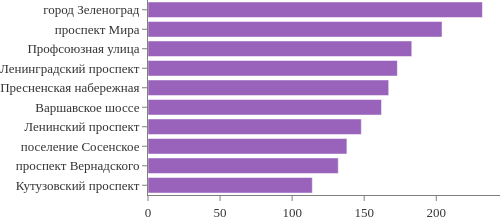

In [37]:
gen = pagri_data_tools.info_gen(df, column='street', mode='column')
gen.next()

Создадим новую категориальную переменную из количества посадочных мест.

Посмотрим на квантили в столбце.

In [38]:
pagri_data_tools.quantiles_columns(df.seats)

Max,1 700
95,214
75,80
50,40
25,12
5,0
Min,0


Для определения границ используем квантили Q1, Q2 и Q3.

Сделаем следующие группы

- до 12 посадочных мест
- от 12 до 80 посадочных мест
- свыше 80 посадочных мест


In [39]:
labels = ['мало', 'средне', 'много']
bins = [-np.inf, 12, 80, np.inf]

In [40]:
df['seats_cat'] = pagri_data_tools.create_category_column(df.seats, labels=labels, bins=bins)
df['seats_cat'].value_counts(dropna=False)

seats_cat
средне    7958
мало      3856
много     3552
Name: count, dtype: int64

### Создание датафреймов для анализа срезов данных

Создадим датафрейм с топ 10 улиц по количеству заведений. Исключим Зеленоград и поселение Сосенское.  

In [41]:
top_streets = df[~df.street.isin(["город Зеленоград", "поселение Сосенское"])]["street"].value_counts().head(10)
top_streets

street
проспект Мира             204
Профсоюзная улица         183
Ленинградский проспект    173
Пресненская набережная    167
Варшавское шоссе          162
Ленинский проспект        148
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: count, dtype: int64

In [42]:
df_top_streets = df[df.street.isin(top_streets.index)]
df_top_streets.head()

,id,name,is_chain,type,address,seats,street,seats_cat
151,155973,кафе андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,много
152,23618,кафе subway,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,средне
153,155852,кафе ламаджо,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,средне
154,152556,шаурма в пите,нет,бистро,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,мало
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,мало


Создадим датафрейм с одним заведением на улице.

In [43]:
streets_with_one_object = df["street"].value_counts()
streets_with_one_object = streets_with_one_object[streets_with_one_object == 1]
streets_with_one_object.head()

street
улица Жуковского                1
2-я улица Энтузиастов           1
улица Достоевского              1
1-й Николощеповский переулок    1
улица Уткина                    1
Name: count, dtype: int64

In [44]:
df_streets_with_one_object = df[df.street.isin(streets_with_one_object.index)]
df_streets_with_one_object.head()

,id,name,is_chain,type,address,seats,street,seats_cat
19,153644,американская лаборатория десертов,нет,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,средне
61,21214,столовая,нет,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица,много
69,22139,хуанхэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,средне
81,25833,азербайджан,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,много
131,150881,вгик,нет,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица,средне


Из внешнего источника загрузим данные о принадлежности адреса к району и округу.

In [45]:
street_info = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSX7HpWtdTP74DCUKStaOf4fyh4CFnJFqq2Su2XwvzLzde26a_EBfIhF9FChpoMwk-s2DO9qLcDYj70/pub?gid=1317405405&single=true&output=csv')
street_info.rename(columns={'streetname':'street'}, inplace=True)
street_info.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Соеденим информацию о районах и округах с нашими данными о заведениях.

In [46]:
df_top_streets.shape[0]

1505

In [47]:
df_top_streets = df_top_streets.merge(street_info, on='street', how='left')
df_top_streets.head()

,id,name,is_chain,type,address,seats,street,seats_cat,areaid,okrug,area
0,155973,кафе андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,много,109,ЮАО,Район Чертаново Центральное
1,155973,кафе андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,много,108,ЮАО,Район Чертаново Северное
2,155973,кафе андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,много,110,ЮАО,Район Чертаново Южное
3,155973,кафе андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,много,99,ЮАО,Донской район
4,155973,кафе андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,много,102,ЮАО,Район Нагатино-Садовники


In [48]:
df_top_streets.shape[0]

7531

Данных стало больше, так как в таблице с информацией о районах и округах улица может принадлежать к несколььким райнам и округам.

Посмотрим сколько улиц у нас не совпало.

In [49]:
df_top_streets.drop(columns=['areaid'], inplace=True)

In [50]:
df_top_streets.isna().sum()

id           0
name         0
is_chain     0
type         0
address      0
seats        0
street       0
seats_cat    0
okrug        0
area         0
dtype: int64

Отлично все улицы совпали.  
Проделаем то же саме для улиц с одним заведением.

In [51]:
df_streets_with_one_object.shape[0]

547

In [52]:
df_streets_with_one_object = df_streets_with_one_object.merge(street_info, on='street', how='left')
df_streets_with_one_object.head()

,id,name,is_chain,type,address,seats,street,seats_cat,areaid,okrug,area
0,153644,американская лаборатория десертов,нет,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,средне,12.00,ЦАО,Район Арбат
1,21214,столовая,нет,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица,много,26.00,ВАО,Район Сокольники
2,22139,хуанхэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,средне,54.00,САО,Район Аэропорт
3,25833,азербайджан,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,много,92.00,СЗАО,Район Хорошево-Мневники
4,150881,вгик,нет,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица,средне,81.00,СВАО,Район Ростокино


In [53]:
df_streets_with_one_object.shape[0]

593

Посмотрим сколько улиц у нас не совпало.

In [54]:
df_streets_with_one_object.drop(columns=['areaid'], inplace=True)

In [55]:
df_streets_with_one_object.isna().sum()

id            0
name          0
is_chain      0
type          0
address       0
seats         0
street        0
seats_cat     0
okrug        29
area         29
dtype: int64

In [56]:
df_streets_with_one_object.isna().sum()['area'] * 100 / df_streets_with_one_object.shape[0]

np.float64(4.8903878583473865)

Около 5% улиц не совпало. Заменим пропуски на 'неизвестно'.

In [57]:
df_streets_with_one_object.shape[0]

593

In [58]:
df_streets_with_one_object.loc[:,['okrug', 'area']] = df_streets_with_one_object[['okrug', 'area']].fillna('неизвестно')
df_streets_with_one_object.isna().sum()

id           0
name         0
is_chain     0
type         0
address      0
seats        0
street       0
seats_cat    0
okrug        0
area         0
dtype: int64

In [59]:
df_streets_with_one_object.shape[0]

593

### Промежуточный вывод


- Создали новую переменную для названия улицы.
- Создали новую категориальную переменную для количества посадочных мест.
- Создали датафреймы для топ 10 улиц по количеству заведений и для улиц, на которых только одно заведение.
- Обогатили данные из внешнего источника информацией о райнах и окргах.

## Визуализация взаимосвязей переменных


### Сравнительный анализ распределений числовых переменных по категориям

In [60]:
df.head(1)

,id,name,is_chain,type,address,seats,street,seats_cat
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,средне


Сормируем словарь для подписей осей и названий графиков.

In [61]:
titles_for_axis = dict(
    seats = ['Количество посадочных мест', 'количество посадочных мест']
    , type = ['Тип заведения', 'типа заведения']
    , street = ['Улица', 'улицы']
    , is_chain = ['Является ли сетевым', 'того, является ли сетевым']
    , name = ['Название', 'название']
)

Изучим распределение количества посадочных мест в разрезе категориальных переменных.

In [83]:
# Функция для обрезки данных по квантилям
def trim_by_quantiles(group):
    lower_bound = group.quantile(0.01)
    upper_bound = group.quantile(0.99)
    return group[(group >= lower_bound) & (group <= upper_bound)]

# Применение функции к каждой категории
trimmed_df = df.groupby(['type', 'is_chain'], observed=True)['seats'].apply(trim_by_quantiles).reset_index().drop(columns=['level_2'])
trimmed_df.head()

,type,is_chain,seats
0,бар,да,43
1,бар,да,25
2,бар,да,6
3,бар,да,49
4,бар,да,150


In [102]:
# group = df.seats
# lower_bound = group.quantile(0.01)
# upper_bound = group.quantile(0.99)
# trimmed_df = df[(group >= lower_bound) & (group <= upper_bound)]
fig = px.violin(trimmed_df, x='type', y='seats', color='is_chain', violinmode='group')
# fig.update_traces(width=1)  # Увеличьте значение для более широких графиков
fig

In [113]:
config = dict(
    df = df
    , cat_var = 'type'
    , num_var = 'seats'
    , legend_var = 'is_chain'
    , top_n='all'
    , lower_quantile=0
    , upper_quantile=0.99
    , bins=20
    , line_width=3
    , opacity = 0.6
    , barmode = 'overlay'
)
pagri_data_tools.boxplots_stacked(config=config, titles_for_axis=titles_for_axis)

In [289]:
config = dict(
    df = df
    , cat_var = 'type'
    , num_var = 'seats'
    , top_n='all'
    , lower_quantile=0
    , upper_quantile=0.99
    , bins=20
    , line_width=3
    , opacity = 0.6
    , barmode = 'overlay'
)
pagri_data_tools.violins_stacked(config=config, titles_for_axis=titles_for_axis)

**Наблюдения:**  

- Больше всего посадочных мест имеют рестораны и столовые. У столовых большой размах значений. У ресторанов много выбросов с большим количеством посадочных мест.
- Закусочные, бистро, кафетерии и кулинарии имеют минимальное количество посадочных мест и минимальный размах значений.

In [ ]:
config = dict(
    df = df
    , cat_var = 'is_chain'
    , num_var = 'seats'
    , top_n='all'
    # , lower_quantile=0
    # , upper_quantile=0.99
    , bins=30
    , line_width=3
    , opacity = 0.6
    # , barmode = 'overlay'
)
pagri_data_tools.histograms_stacked(config=config, titles_for_axis=titles_for_axis)

In [ ]:
config = dict(
    df = df
    , cat_var = 'is_chain'
    , num_var = 'seats'
    , top_n='all'
    , lower_quantile=0
    , upper_quantile=0.99
    , bins=30
    , line_width=3
    , opacity = 0.6
    # , barmode = 'overlay'
)
pagri_data_tools.histograms_stacked(config=config, titles_for_axis=titles_for_axis)

**Наблюдения:**  

- В не сетевых заведениях размах количества посадочных мест немного больше и выбросов с высоким количеством посадочных мест больше. При этом медианные значения  количества посадочных мест в сетевых и не сетевых заведениях одинаковые.

In [ ]:
config = dict(
    df = df
    , cat_var = 'street'
    , num_var = 'seats'
    , top_n=20
    , lower_quantile=0
    , upper_quantile=1
    , bins=20
    , line_width=3
    , opacity = 0.6
    , barmode = 'overlay'
)
pagri_data_tools.violins_stacked(config=config, titles_for_axis=titles_for_axis)

In [ ]:
config = dict(
    df = df
    , cat_var = 'street'
    , num_var = 'seats'
    , top_n=20
    , lower_quantile=0
    , upper_quantile=0.99
    , bins=20
    , line_width=3
    , opacity = 0.6
    , barmode = 'overlay'
)
pagri_data_tools.violins_stacked(config=config, titles_for_axis=titles_for_axis)

**Наблюдения:**  

- Значительных различий в количестве посадочных мест у топ 20 улиц по количеству заведений нет.

In [139]:
config = dict(
    df = df[df.is_chain=='да']
    , cat_var = 'name'
    , num_var = 'seats'
    , top_n=20
    , lower_quantile=0
    , upper_quantile=0.99
    , bins=20
    , line_width=3
    , opacity = 0.6
    , barmode = 'overlay'
)
pagri_data_tools.violins_stacked(config=config, titles_for_axis=titles_for_axis)

**Наблюдения:**  

- Чайхана №1 имеет самый большой размах по количеству посадочных мест. 
- Медианне значения посадочных мест выше у чайхана №1, якитория и тануки.

### Изучение зависимостей между категориальными переменными


Сормируем словарь для подписей осей и названий графиков.

In [151]:
titles_for_axis = dict(
    seats = ['Количество посадочных мест', 'количество посадочных мест', 1]
    , type = ['Тип заведения', 'типа заведения', 'типу заведения']
    , street = ['Улица', 'улицы', 'улице']
    , is_chain = ['Является ли сетевым', 'того, является ли сетевым', 'по тому, является ли сетевым']
    , name = ['Название', 'названия', 'названию']
)

In [ ]:

config = dict(
    df = df
    , column_for_axis = 'is_chain'
    , barmode = 'group'
    , orientation = 'h'
    , normalized_mode = 'all'
    , height = 400
    , width = 600
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = True
    , showgrid_y = False      
    , sort_axis = True    
    , sort_legend = True    

)
pagri_data_tools.bar_categories(config, titles_for_axis)


**Наблюдения:**   
- Заведений, которые не являются сетевыми, большинство (80.7%).

In [107]:

config = dict(
    df = df
    , column_for_axis = 'type'
    , barmode = 'group'
    , orientation = 'h'
    , normalized_mode = 'all'
    , height = 400
    , width = 600
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = True
    , showgrid_y = False      
    , sort_axis = True    
    , sort_legend = True    

)
pagri_data_tools.bar_categories(config, titles_for_axis)


**Наблюдения:**   
- 39.7% всех заведений являются кафе. Столовых - 16.8%, ресторанов - 14.9% и бистро 12.5%. Остальные завдения занимают 5 и меньше долю всех заведений.

In [ ]:

config = dict(
    df = df
    , column_for_axis = 'type'
    , column_for_legend = 'is_chain'  
    , barmode = 'group'
    , orientation = 'v'
    , normalized_mode = 'all'
    , height = 450
    , width = 1000
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = False
    , showgrid_y = True      
    , sort_axis = True    
    , sort_legend = True    

)
pagri_data_tools.bar_categories(config, titles_for_axis)


**Наблюдения:**   
- Сетевые заведения в основном имеют тип кафе, ресторан и бистро.

In [153]:

config = dict(
    df = df
    , column_for_axis = 'type'
    , column_for_legend = 'is_chain'  
    , barmode = 'group'
    , orientation = 'v'
    , normalized_mode = 'col'
    , height = 450
    , width = 1000
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = False
    , showgrid_y = True      
    , sort_axis = True    
    , sort_legend = True    

)
fig = pagri_data_tools.bar_categories(config, titles_for_axis)
fig.update_layout(
    title_text = 'Распределение долей для типа заведения и того, является ли сетевым с нормализацией по тому, является ли сетевым'
)

**Наблюдения:**  

- В сетевы заведениях значительная доля кафе (47%), бистро (27%) и ресторанов (18%).
- В не сетевых заведениях значительная доля кафе (37.9%), столовая (21%), ресторанов (14%) и бистро (9%).
- Столовые практически все являются не сетевыми.

In [157]:
config = dict(
    df = df
    , column_for_axis = 'type'
    , column_for_legend = 'is_chain'  
    , barmode = 'group'
    , orientation = 'v'
    , normalized_mode = 'row'
    , height = 450
    , width = 1000
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = False
    , showgrid_y = True      
    , sort_axis = True    
    , sort_legend = True    

)
fig = pagri_data_tools.bar_categories(config, titles_for_axis)
fig.update_layout(
    title_text = 'Распределение долей для типа заведения и того, является ли сетевым с нормализацией по типу заведения'
)

**Наблюдения:**  

- Среди всех сетевых заведений у бистро самая высокая доля заведений. А вот у не ресторанов самые высокие доли у столовой (99.9%), буфета (98.1%) и бара (95.7%).

In [159]:

config = dict(
    df = df[~df.street.isin(['город Зеленоград', 'поселение Сосенское'])]
    , column_for_axis = 'street'
    , barmode = 'group'
    , orientation = 'h'
    , normalized_mode = 'all'
    , top_n_trim_axis = 10
    , height = 400
    , width = 600
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = True
    , showgrid_y = False      
    , sort_axis = True    
    , sort_legend = True    

)
pagri_data_tools.bar_categories(config, titles_for_axis)


**Наблюдения:**   
- Больше всего заведений на проспекте Мира (204 заведения).

In [146]:

config = dict(
    df = df[df.is_chain == 'да']
    , column_for_axis = 'name'
    , barmode = 'group'
    , orientation = 'v'
    , normalized_mode = 'all'
    , top_n_trim_axis = 20
    , height = 450
    , width = 1000
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = False
    , showgrid_y = True      
    , sort_axis = True    
    , sort_legend = True    

)
pagri_data_tools.bar_categories(config, titles_for_axis)

**Наблюдения:**  

- Из сетевых заведений больше всего заведений у шоколадницы (5.3%), kfc (5.2%), макдоналдс (5.1%) и бургер кинг (4.6%).

In [147]:

config = dict(
    df = df
    , column_for_axis = 'street'
    , column_for_legend = 'is_chain'  
    , barmode = 'group'
    , orientation = 'v'
    , normalized_mode = 'all'
    , top_n_trim_axis = 20
    , height = 450
    , width = 1000
    , text = False
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = False
    , showgrid_y = True      
    , sort_axis = True    
    , sort_legend = True    

)
pagri_data_tools.bar_categories(config, titles_for_axis)


**Наблюдения:**   
- На пресненской набережно доля сетевых заведений значительно ниже, чем не сетевых.

### Изучение зависимостей между числовыми и категориальными переменными


Построим графики для числовых переменных в разрезе категорий.

In [120]:
config = dict(
    df = df
    , x = 'type'
    , y = 'seats'  
    , barmode = 'group'
    , orientation = 'h'
    , func = 'median'
    , height = 400
    , width = 600
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = True
    , showgrid_y = False       
    , sort_axis = True    
    , sort_legend = True                                                                   
)
pagri_data_tools.bar(config, titles_for_axis)


**Наблюдения:**   
- Медианно количество посадочных мест больше всего у ресторанов и столовых.

In [131]:
config = dict(
    df = df
    , x = 'type'
    , y = 'seats'  
    , category = 'is_chain' 
    , barmode = 'group'
    , orientation = 'v'
    , func = 'median'
    , height = 450
    , width = 1000
    , xaxis_show = True
    , yaxis_show = True
    , showgrid_x = False
    , showgrid_y = True       
    , sort_axis = True    
    , sort_legend = True                                                                   
)
pagri_data_tools.bar(config, titles_for_axis)


**Наблюдения:**   
- Медианное количество посадочных мест у сетевых заведений выше, за исключением буфетов. Из-за буфетов общая картина выглядит равной.

### Анализ срезов данных 

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_pagristart_` где начало и `_pagriend_` где конец

Не забываем удалить метки `_pagristart_` и `_pagriend_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

ВАЖНО   
пройти и отсортировать графики с одинаковыми числовыми переменными  
То есть, чтобы 1 числовая переменная в разрезе разных категорий шли подряд.  
То есть чтобы все графики с выручкой шли подряд, чтобы все графики по количеству звонков в разрезе разных категорий шли подряд.  

ВАЖНО  
подумать для каждого раздела в визуализации (временные, числовые, категориальные и числовые с категориальными)  
какие закономерности не проверил.  
убедиться, что все зависимости, которые были в задании изучили.  
Это самый важный моменты, тут лучше остановится и тщательно подумать,  
так как могут быть изучены не все зависимости.

ВАЖНО   
Убедиться, что сетки по осям стоят где нужно, часто для вертикальных или горизонатльных графиков лишняя сетка вдоль баров

ОЧЕНЬ ВАЖНО  
Когда построили все графики и собрали все выводы, то проходим снова и смотрим все графика, зная все выводы, и думаем какие выводы ещё можно сделать.  
Так как в этом случае можно сделать выводы, на основе уже имеющихся, их объединяя или даже заметить что-то новое.  

## Формулирование и провера гипотез


### Формулирование гипотез


ВАЖНО  
Когда смотрим графики и не видим явных различий, то нельзя сразу пропускать график, нужно подумать важная ли это зависимость для нас.  
Если нам это важно и значения не прям идеально ровно расположены, то сохраняем график и сразу пишем в temp.ipynb для гипотезы вывод.
Гипотезы формулируем для случаев, когда на графике нет явных различие числовой переменной по категории.  
Если различия явные, то нет смысла  проводить тест.

ВАЖНО  
Если у нас числовая перменная разбита на 2 столбца, то также нужно проверить гипотезы.

ВАЖНО  
это редко бывает, но нужно об этом помнить  
Когда мы хотим проверить какую-то гипотезу на основе среднего или другой статистики, то нужно подумать нет ли сильного разделения на группы  
по какой-нибудь категориальной переменной.  
Если у нас есть такое разделение, то нужно использовать стратифицированную выборку.  
То есть мы должны взять выборку из каждой группы пропорционально её размеру.  
Считаем коэффициенты каждой группы (ее размер делим на количество всей выборки) и умнажаем их на количество нужных элементов.  
То есть мы из каждой страты возьмем прпорциональное количество элементов.  
Нарпимер, мы хотим сравнить средние значения дохода в двух компаниях.  
И берем по 100 сотрудников из каждой. Без стратификации у нас редкие сотрудники могут не попасть.  
Поэтому мы берем категориальную переменную (например должность) и делим выборку на группы. И из каждой берем пропорциональное количество элементов.

Смотрим выводы раздела визуализации взаимосвязей и из них формулируем гипотезы.  

И далее думаем какие гипотезы можно ещё проверить, которых у нас нет в выводах.  

На основе проведенного анализа данных сформулирем следующие гипотезы:


- Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок.  
- Гипотеза 2: У мужчин средний доход выше  
- Гипотеза 3: Цель получения кредита не зависит от среднего ежемесяченого доход  
- Гипотеза 4: Средний доход по семейному статусу одинаковый, но у вдовцов отличается  
- Гипотеза 5: У должников в среднем больше детей  
- Гипотеза 6: У должников средний возраст ниже  
- Гипотеза 7: Медианный доход у должников и не должников не отличаетс

> Не забываем что гипотезы можно проверять и между 2 категориальными переменными.  
> Проверять есть ли между ними зависимости.  
> Также если мы на графиках определили, что есть между 2 категориальными перменными связь, то тут можем это проверить


### Проверка гипотез


ВАЖНО  
принято в выводе писать положительный результат  
то есть пишем что гипотеза подтвердилась и указваем какая гипотеза.  
То если мы опровергли нулевую гипотезу, то пишем альтернативную гипотезу и пишем что она подтвердилась.  
Если у нас нет оснований отвергнуть нулевую гипотезу, то пишем нулевую гипотезу и пишем что нет оснований ее отвергнуть.  
То есть если мы отвергаем, то формулируем вывод как положительный, чтобы не было путаницы, а если нет оснований, то так и пишем.  

> Алгоритм проверки статистических гипотез

- постановка задачи
  > - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)
  > - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
- формулировка гипотез
  > - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок  
  >   (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
  > - формулировка альтернативной гипотезы - с точки зрения неравенства параметров  
  >   (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)
- выбор критерия alpha (почему 0.05 или 0.01)
  > - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
  > - в ежедневных бизнес задачах, обычно - 0.05
- анализ распределения
  > - визуальная оценка
  > - следим за выбросами
  > - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
  > - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов)  
  >   может быть использован t-test именно для проверки гипотезы о равенстве средних.  
  >   Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова
- выбор критерия
  > - при оценке равенства средних T-test или Welch T-test (если есть сомнения, то лучше Уэлча)
  >   - при рвенстве дисперсий используем обычный т тест
  >   - если дисперсии в выборках разные, то используем т теста Уэлча
- получение результата
  > - расчет p-value
- интерпретация p-value
  > - сравнение p-value и alpha
  > - если альфа > p-value - отвергаем нулевую гипотезу
  > - если альфа < p-value - не можем отвергнуть нулевую гипотезу


> Какая у нас задача

- Исследовать взаимосвязь между 2 переменными
  > - обе переменные наминативные
  >   - Хи-квадрат Пирсона (не чувствителен к гетероскедастичности) (нормальность не обязательна)
  > - обе переменные количественные
  >   - Коэффициент корреляции Пирсона (параметрика) (чувствителен к выбросам) (только непрерывные переменные)
  >   - Коэффициент корреляции Спирмена (чувствителен к выбросам) / Кендалла (менее чувствителен к выбросам) (непараметрика) (непрерывные переменные и порядковые категориальные переменные)
  > - одна переменная номинативная (принимает 2 занчения), вторая количественная
  >   - значения
  >     - Т-критерий Стьюдента (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >       - если дисперсии равны (тест левена, барлета) и количество в группах равно (тест на равенство пропорций), то используем обычный т тест (эта формула более точно даст результат для этого случая)
  >       - если дисперсии не равны (тест левена, барлета) или количество в группах не равно (тест на равенство пропорций), то используем тест Уэлча (эта формула использует больше неопределенности и лучше подходит для этого случая)
  >     - U-критерий Манна-Уитни (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  >       Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
  >       то критерий Манна-Уитни применим
  >   - доли
  >     - Z тест для долей (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  >     - Chi-square тест для долей (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
- Исследовать взаимосвязь между несколькими переменными
  > - Дисперсионный анализ (параметрика) (дисперсии в группах должны быть примерно равны) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
  > - Welch's ANOVA (устройчив к разной дисперсии в группах) (требует более больших размеров групп для точных результатов) (желательно нормальность) (чувствителен к выбросам) (не чувствителен к гетероскедастичности)
  > - Критерий Краскела-Уоллиса (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
  > - Тест Тьюки (если anova или Краскела-Уоллиса нашил различия) (дисперсии в группах должны быть примерно равны) (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
- Проверить на равенство дисперсий в группах перед anova
  > - Levene's test (не требует нормальность) (менее чувствительный)
  > - Bartlett's test (требует нормальность) (более чувствительный)


Сормируем словарь для подписей осей и названий гистограм.


In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']    
)

Примеры для разных критериев

#### 2 категориальные переменные и мы хотим сравнить количество в каждой группе.

**Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок**


> H0: Наличие детей не влияет на возврат кредита в срок.  
> H1: Наличие детей влияет на возврат кредита в срок.


Так как у нас обе переменных категориальные, то воспользуемся критерием хи-квадрат Пирсона.  
Уровень значимости alpha выберем 0.05


Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chi2_pearson(df.has_child, df.debt)

Хи-квадрат Пирсона
alpha =  0.05
p-value =  1.724356890544321e-05
Отклоняем нулевую гипотезу, поскольку p-value меньше уровня значимости


**Результат:**  

На уровне значимости 0.05 нулевая гипотеза о том, что наличие детей не влияет на возврат кредита в срок, была отклонена. Это свидетельствует о том, что существует статистически значимое влияние наличия детей на возврат кредита в срок.


#### Одна категориальная переменная и мы хотим проверить отличается ли количество в одной категориальной переменной, то используем chisquare

Он проверяет, насколько наблюдаемое распределение категориальной переменной отличается от ожидаемого равномерного распределения.  

**Гипотеза 1: Нет зависимости между количеством публикаций и днем недели.**  

H0: День недели не влияет на количество объявлений  
H1: День недели влияет на количество объявлений

In [ ]:
daily_counts = df['publication_weekday'].value_counts().sort_index()
daily_counts

publication_weekday
Понедельник    3591
Вторник        4157
Среда          3940
Четверг        4270
Пятница        3970
Суббота        1918
Воскресенье    1681
Name: count, dtype: int64

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
pagri_data_tools.chisquare(daily_counts)

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что день недели не влияет на количество объявлений, была отклонена. Это указывает на то, что существует статистически значимое влияние дня недели на количество объявлений.

#### Категориальная с 2 значениями и числовая переменная  (тест манна уитни)

**Гипотеза 2: У мужчин средний доход выше**  

H0: У мужчин средний доход не выше, чем у женщин   
H1: У мужчин средний доход выше, чем у женщин

посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Делаем вывод о распределении.  
Выбираем критерий для проверки гипотезы.  
Определяем уровнь значимости

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

У нас значительные выбросы в доходе нужно использовать непараметрический тест

Используем критерий Манна-Уитни  
Альтернатива будет - больше  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

In [ ]:
male = df[df.gender=='M']['total_income']
female = df[df.gender=='F']['total_income']

Если используем альтернативу, то отсчет идет от первого аргумента функции.  
То есть он должен быть больше или меньше, исходя из постановки гипотезы. И исходя из этого выбераем параметр alternative.

In [ ]:
pagri_data_tools.mannwhitneyu(male, female, alternative='l')

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что у мужчин средний доход не выше, чем у женщин, была отклонена. Это указывает на то, что доход мужчин статистически значимо выше, чем у женщин.

#### Категориальная с 2 значениями и числовая переменная  (т тест)

Если используем ттест, то сначала проводим тест на проверку дисперсии


Распределение близко к нормальному, поэтому будем использовать тест ANOVA

Проверим гипотезу, что дисперсии в группах не отличаются

H0: Дисперсия оценок критиков в разных категориях продаж не отличается.  
H1: Дисперсия оценок критиков в разных категориях продаж отличается.  


Используем тест Левена


In [ ]:
yes = df[df.debt=='есть']['age']
no = df[df.debt=='нет']['age']

In [ ]:
pagri_data_tools.levene([yes, no])

In [ ]:
pagri_data_tools.levene_df(df[['sales_cat', 'critic_score']])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

Если используем альтернативу, то отсчет идет от первого аргумента функции.  
То есть он должен быть больше или меньше, исходя из постановки гипотезы. И исходя из этого выбераем параметр alternative.

In [ ]:
pagri_data_tools.ttest_ind(yes, no, equal_var=False, alternative='s')

Построим доверительный интервал

In [ ]:
pagri_data_tools.confint_t_2samples(yes, no, equal_var=False, alternative='s')

#### Категориальная переменная, у которой больше 2 значений и числовая (ANOVA)

**Гипотеза 4: Средний доход по семейному статусу не отличается**  

H0: Средний ежемесячный доход не различается между группами по семейному статусу  
H1: Средний ежемесячный доход различается между группами по семейному статусу  


посмотрим на распределение

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

Делаем вывод о распределении.  
Выбираем критерий для проверки гипотезы.  
Определяем уровнь значимости

Предположения ANOVA:
- Данные должны быть нормально распределены.
- Дисперсии в группах должны быть равны (гомоскедастичность).
- Наблюдения должны быть независимыми.

Если хоть одно из этого не выполняется, то лучше использовать kruskal

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  
тест манна уитни

Если эти предположения выполняются, то используем тест ANOVA

Если используем anova, то сначала проводим тест на проверку дисперсии


ANOVA уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна.   
Но если после anova мы хотим сравнить отдельные пары, то будет множественное сравнение, и поправка Бонферрони нужна.

Если используем anova, то сначала проводим тест на проверку дисперсии



Проверим гипотезу, что дисперсии в группах не отличаются

H0: У должников и не должников дисперсия не отличается  
H1: У должников и не должников дисперсия отличается

Используем тест Левена


In [ ]:
gropu_a = df[df.debt=='a']['age']
gropu_b = df[df.debt=='b']['age']
gropu_c = df[df.debt=='c']['age']

In [ ]:
pagri_data_tools.levene([gropu_a, gropu_b, gropu_c])

In [ ]:
pagri_data_tools.levene_df(df[['sales_cat', 'critic_score']])

Так как дисперсия в группах разная, будем использовать тест Уэлча.  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

Если дисперсии не отличаютс, то проводим обычный ANOVA

In [ ]:
pagri_data_tools.anova_oneway_df(df[['family_status', 'total_income']])

Если гипотеза о равенстве дисперсий была отклонена, то используем ANOVA Welch.

In [ ]:
pagri_data_tools.anova_oneway_welch_df(df[['family_status', 'total_income']])

Если нулевая гипотеза отклонилась, то можно определить в каких парах есть различия.  
Можно использовать множественное сравнение и т тест или мана уитни, но обязательно использовать поправку бонферони.  
Или можно использовать тест Тьюки.

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

тест Тьюки уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Смотрим в каких парах гипотеза отвергается

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

#### Категориальная переменная, у которой больше 2 значений и числовая (Kruskal-Wallis)

Если распределение не нормальное или много выбросов или просто нет уверености, что параметрика будет хрошо работать, то используем  непараметрические методы.

Используем критерий Краскела-Уоллиса  
Уровень значимости alpha выберем 0.05

Убедимся, что у нас достаточно значнеий в каждой группе

Для параметрических тестов в каждой группе должно быть больше 30 элементов, а для не параметрических тестов больше 10 значений.

In [ ]:
df_by_userid_month['age_cat'].value_counts()

age_cat
старше 60    855
до 30        751
40-50        587
50-60        532
30-40        489
Name: count, dtype: int64

критерий Краскела-Уоллиса уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна.   
Но если после критерия Краскела-Уоллиса мы хотим сравнить отдельные пары, то будет множественное сравнение, и поправка Бонферрони нужна.

In [ ]:
pagri_data_tools.kruskal_df(df[['family_status', 'total_income']])

Если нулевая гипотеза отклонилась, то можно определить в каких парах есть различия.  
Можно использовать множественное сравнение и т тест или мана уитни, но обязательно использовать поправку бонферони.  
Или можно использовать тест Тьюки.

Используем тест Тьюки, чтобы определить различия между группами  
Уровень значимости alpha выберем 0.05

тест Тьюки уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

In [ ]:
pagri_data_tools.tukey_hsd_df(df[['family_status', 'total_income']])

Смотрим в каких парах гипотеза отвергается

Видим, что гипотеза отвергается в парах где есть вдова / вдовец


**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что средний ежемесячный доход не различается между группами по семейному статусу, была отклонена.  
Это указывает на то, что семейный статус оказывает статистически значимое влияние на ежемесячный доход.

#### Бутстреп (категориальная переменная имеет 2 значения)

Если мы не хотим использовать параметрику или не параметрику или нам нужно проверить гипотезу не по среднему, например, медиана или какой-то перцинтиль,  
то используем бутстреп

**Если категориальная переменная имеет 2 занчения.**

Вместо теста манна уитни, когда нет уверености в т тесте, можно использовать бутстреп

**Гипотеза 7:  Медианный доход у должников и не должников не отличается**  

H0: Медианный доход у должников и не должников не отличается  
H1: Медианный доход у должников и не должников отличается


Используем бутстреп для проверке гипотезы  
Уровень значимости alpha выберем 0.05

Когда мы сравниваем две группы в бутстрепе, мы можем просто посмотреть, находится ли 0 внутри доверительного интервала, чтобы определить, существует ли статистически значимое различие между группами.   
Если 0 лежит вне доверительного интервала, то мы можем сказать, что существует статистически значимое различие между группами.

In [ ]:
yes = df[df.debt=='есть']['total_income']
no = df[df.debt=='нет']['total_income']

In [ ]:
fig = pagri_data_tools.bootstrap_diff_2sample(yes, no, stat_func=np.median)

In [ ]:
fig.show()

**Результат:**  

- На уровне значимости 0.05 нулевая гипотеза о том, что медианный доход у должников и не должников не отличается, была отклонена.  
Это указывает на то, что существует статистически значимая разница между медианным доходом должников и не должников.  
95 % доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34)


#### Бутстреп (категориальная переменная больше 2 значений)

Когда у нас больше двух групп, способ определения результата по позиции нуля от разности внутри или вне доверительного интервала не работает, поскольку мы имеем несколько доверительных интервалов для каждой пары сравнений.

Чтобы сравнить средние значения зарплаты между тремя и более группами, мы можем использовать бутстрэп. Алгоритм бутстрэпа будет следующим:

- Создаем выборку с заменой из исходных данных.
- Вычисляем средние значения зарплаты для каждой группы в выборке.
- Вычисляем разности средних между группами (например, разность между Молодым и Взрослым, между Взрослым и Старым и т.д.).
- Повторяем шаги 1-3 many times (например, 1000 раз).
- Строим гистограмму распределения разностей средних, полученных на шаге 3.
- Определяем p-value



Поправка Бонферрони заключается в том, что для значимости результата необходимо, чтобы p-value для каждого сравнения было меньше уровня значимости, разделенного на количество сравнений. Например, если уровень значимости равен 0.05, а мы делаем три сравнения, то необходимо, чтобы p-value для каждого сравнения было меньше 0.05/3 = 0.0167.

В случае использования бутстрэпа, мы можем применить поправку Бонферрони следующим образом:

- Вычисляем разности средних для каждой пары сравнений.
- Вычисляем p-value для каждой пары сравнений, используя гистограмму распределения разностей средних.
- Применяем поправку Бонферрони, разделяя уровень значимости на количество сравнений.
- Если p-value для какой-либо пары сравнений меньше поправленного уровня значимости, то считаем, что различие между группами статистически значимо.

В нашем примере, если мы применяем поправку Бонферрони, то необходимо, чтобы p-value для каждого сравнения было меньше 0.05/3 = 0.0167. Если мы получили следующие результаты:

- Разность между Молодым и Взрослым: 8000 (p-value: 0.01)
- Разность между Взрослым и Старым: 3000 (p-value: 0.04)
- Разность между Молодым и Старым: 11000 (p-value: 0.001)
- Тогда мы можем заключить, что средняя зарплата у Старых статистически значимо выше, чем у Молодых и Взрослых (поскольку p-value для этого сравнения меньше поправленного уровня значимости). Для остальных сравнений мы не можем сделать выводы о статистической значимости, поскольку p-value больше поправленного уровня значимости.

> Для проверки дисперсии

In [ ]:
pagri_data_tools.levene_df
pagri_data_tools.levene
pagri_data_tools.bartlett_df
pagri_data_tools.bartlett

> Выбираем критерий


In [ ]:
pagri_data_tools.chi2_pearson
pagri_data_tools.ttest_ind_df
pagri_data_tools.ttest_ind
pagri_data_tools.mannwhitneyu_df
pagri_data_tools.mannwhitneyu
pagri_data_tools.proportion_ztest_1sample
pagri_data_tools.proportions_ztest_2sample
pagri_data_tools.proportions_ztest_column_2sample
pagri_data_tools.proportions_chi2
pagri_data_tools.proportions_chi2_column
pagri_data_tools.anova_oneway_df
pagri_data_tools.anova_oneway
pagri_data_tools.tukey_hsd_df
pagri_data_tools.anova_oneway_welch_df
pagri_data_tools.kruskal_df
pagri_data_tools.kruskal
pagri_data_tools.bootstrap_diff_2sample # важно, сохраняем fig и в следующей ячейке делаем fig.shwo(), иначе на google colab работает некорректно

> Если отклоняем гипотезу, то строим доверитлеьный интервал


In [ ]:
pagri_data_tools.confint_t_2samples
pagri_data_tools.confint_t_2samples_df
pagri_data_tools.confint_proportion_ztest_2sample
pagri_data_tools.confint_proportion_ztest_column_2sample
pagri_data_tools.confint_proportion_2sample_statsmodels
pagri_data_tools.confint_proportion_coluns_2sample_statsmodels

> Сделать опцию в бутстреп функции, чтобы строился только доверительный интервал


> Также сделать функцию для доверилеьных интервалов для мана уитни через  
> the Hodges-Lehmann estimation, which provides a point estimate and a confidence interval for the difference in medians.


In [ ]:
import pingouin as pg

# Perform the Mann-Whitney U test and calculate the confidence interval
mw_test = pg.mwu(x, y, tail='two-sided', confidence=0.95)

# Print the results
print(mw_test)

In [ ]:
import numpy as np
from scipy import stats

# Perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(x, y, alternative='two-sided')

# Calculate the Hodges-Lehmann estimation
hl_est = np.median(np.array([x_i - y_j for x_i in x for y_j in y]))

# Calculate the confidence interval
ci = stats.t.interval(0.95, len(x) + len(y) - 2, loc=hl_est, scale=stats.sem(np.array([x_i - y_j for x_i in x for y_j in y])))

# Print the results
print('Hodges-Lehmann estimation:', hl_est)
print('Confidence interval:', ci)

> Подход следуюищй - мы до раздела проверка гипотез, когда изучаем данные (разделы пропусков, выбросов, дубликатов, зависиместей между перменными и графики),  
> то мы делаем выводы и формируем наблюдеия.  
> Вот эти наблюдения и выводы нужно проверить в проверке гипотез.  
> И потом в основном выводе уже писать не просто, что у нас мужчин больше чем женьшин, а писать, что на уровен значисомти таком то у нас мужчина больше чем  
> женщин с таким то доверительным интервалом.  
> Таким образом выводы по вомзожности должны проходить через этап проверки гипотез, тогда эти выводы становятся более существенными.


- Гипотезы появляются, когда мы задаем вопросы данным. Мы изучили данные, преобработали и теперь начинаем задавать вопросы.
- Выдвигаем гипотезу (заметили что-то необычное и хотим проверить), далее формулируем ее и далее проверяем.
- Не забываем формулировать гипотезы словами. Пишем что является гипотезой H0, а что гипотезой H1
- Формулируем все гипотезы, которые хотим проверить. Если будет 100 гипотез, то все 100 нужно сформулировать и потом проверить и сделать вывод.
- Гипотезы могут быть и простыми вопросами без гипотез H0 и H1, такие гипотезы мы проверяем графиками или анализируя таблицу.
- Восновном, когда мы собиаремся применить стат аппарат для проверки гипотезы, то мы должны записать ее через H0 и H1.


> Отличная статья про доверительные интервалы для разных статистик  
> https://habr.com/ru/articles/807051/


> Bootstrapping


> В бутстрепе, если мы хотим сравнить две выборки, то нельзя смотреть  
> где находится исходная разница средних в бутстрапированной выборке  
> Так как мы берем бутстреп из наших выборок и впролне реально.что наша разность  
> будет близка к с реднему бутстропированной выборки  
> Поэтому p value нужно определять по месту нуля в бутстропированной выборке


> Посмотрим p value для 0 (если различий нет, то разница должна быть 0)
> Для этого посчитаем cdf для + и - среднего, чтобы получить 2 значения cdf
> а теперь возьмем минимум и умножим на 2, так как альт гипотеза у нас.что
> просто не равно 0, значит и справа и слева


In [ ]:
Estimating the power of a non-parametric test using bootstrapping involves simulating the testing process multiple times to estimate the probability of rejecting the null hypothesis. Here's a general outline of the steps:

**Specify the null and alternative hypotheses **: Define the null and alternative hypotheses for your test. For example, the null hypothesis might be that the two groups have the same distribution, and the alternative hypothesis might be that the two groups have different distributions.

Generate simulated data: Generate simulated data that reflects the null hypothesis. For example, you could generate two groups of random data from the same distribution.

Perform the Mann-Whitney U test: Perform the Mann-Whitney U test on the simulated data to obtain a p-value.

Repeat steps 2-3 many times: Repeat steps 2-3 many times (e.g., 1000 times) to generate a distribution of p-values under the null hypothesis.

Estimate the power: Estimate the power of the test by calculating the proportion of times the p-value is below a certain significance level (e.g., 0.05) when the alternative hypothesis is true. To do this, you'll need to generate simulated data that reflects the alternative hypothesis and repeat steps 2-4.

### Промежуточный вывод


Чтобы собрать все наблюдения используем это  
нужно поставить `_pagristart_` где начало и `_pagriend_` где конец

Не забываем удалить метки `_pagristart_` и `_pagriend_` 

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.collect_observations(notebook_path, '/home/pagri/git_repos/pagri-projects/quarto/projects/prospective_tariff_for_telecom/temp_for_report.ipynb')

- На уровне значимости 0.05 гипотеза, что есть зависимость между количеством публикаций и днем недели подтвердилась.  
- На уровне значимости 0.05 гипотеза, что удаленность от центра влияет на количество публикаций, подтвердилась.  

## Общий вывод


ВАЖНО  
проверить, что результат проверки гипотез учтен в выводах.  
То есть если у нас был промежуточный вывод, но проверка гипотез опровергла этот вывод, то нужно изменить вывод на противоположный.

Проходим собираем все промежуточные выводы, вставляем сюда и выбираем важные. 

ВАЖНО  
из промежуточных выводов в изучении данных собрать подобные выводы:  
- Рынок жилья представлен объектами общей площадью от 12 до 900 кв.м. В основном это жилье от 30 до 100 кв.м. с пиком в сегменте 30-75 кв.м. В жилой площади квартиры преобладает диапазон 15-50 кв.м. Размер площади кухни-от 5 до 15 кв.м., с пиком 9 кв.м. Это стандартные небольшие квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,6-2,7 м., но встречаются редкие варианты до 19 комнат и высотой потолка до 20 кв.м. (либо ошибка, либо свободная планировка с возможностью многоуровневости).
- Цены на квартиры в основном находятся в диапазоне 2.5-15 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса), но есть и уникальные объекты стоимостью до 763 млн.руб. Стоимость квадратного метра недвижимости варьируется от 50-130 тыс.руб. с пиком в 90-100 тыс.руб. Наряду с типовыми предложениями на продажу выставлено жилье премиум-класса со стоимостью 1 кв.м. до 1.9 млн.руб.
- Общее время продажи жилой недвижимости-до 1618 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных -185 дней. При этом можно увидеть, что пик продаж приходится на 45-60 день с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 16 дней и слишком долго, если до оформления сделки свыше 1134 дней.    

Это важно, так как дает представление о данных в сжатой и удобной форме.  
А далее уже идут выводы о зависимостях.  

Не забываем ставить 2 пробела после Выводы и другие для quarto

После каждой строки поставить либо перенос, либо 2 пробела для quarto  
так как когда следующая строка начинается с дефиса и jupyter это понимает и делает новую строку,   
то quarto не сделает новую строку

**Выводы:**  


- Долги есть у людей с разным доходом.  
- У должников в среднем больше детей.  
- У должников среднее количество детей больше у женщин, а у не должников срднее количество детей больше у мужчин  
- У должников средний возраст немного ниже для всех категорий семейного положения.  
- Медианный доход у должников и не должников практически не отличается  
- Должники имеют ниже средний возраст как мужчины так и женщины. Ситуация сохраняется во всех группах дохода.  
- Цель получения кредита практически не зависит от среднего ежемесяченого дохода.  
- 92 % клиентов не имеют долга.  
- Люди от 30 до 50 лет имеют самый высокий средний доход.  
- Больше всего кредит берут на цели, связанные с недвижимостью, кроме людей в гражданском браке  
- Люди в гражданском браке чаще берут кредит на свадьбу  
- Женщины чаще возвращают кредит.  
- Анализ значимости признаков для модели случайного леса показал, что доход является самым значимым признаком для предсказания задолженности.  
- 58 % клиентов либо женаты, либо замужем. 19 % в гражданском браке. Можно сделать вывод что большинство в браке.  
- Большинство клиентов женщины (66 процентов).  
- Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.  
- Чем меньше количество детей, тем больше значений с высоким доходом.  
- Болшая часть женатых имеет доход 100-200 тыс  
- На всех уровнях образоания, кроме ученой степени, доход у мужчин выше.  
- У мужчин, которые в браке или были в браке, количество детей больше, чем у женщин в той же категории.  


**Аномалии и особенности в данных:**  

- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.  
- Колонока общий трудовой стаж содержит 74 % отрицаетльных значений. А также максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет.  
- В колонке возраста 101 нулевое значени.  
- Колонка дохода имеет слишком много знаков после запятой.  
- В колонке с образованием присутствуют одни и те же знчения с разными регистрами. При этом в колонке с id образования все впрорядке.  


**Результаты предобработки данных:**  

- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.


**Результаты проверки гипотез:**  

- Гипотеза 1: Средняя выручка с пользователя не зависит от возрастной группы.  
**Результат:** На уровне значимости 0.05 гипотеза была отклонена.  
Это указывает на то, что возрастная группа оказывает статистически значимое влияние на среднюю выручку с пользователя.
- Гипотеза 2: Средняя выручка между тарифами Smart и Ultra не отличается.  
**Результат:** На уровне значимости 0.05 гипотеза была отклонена.  
Это указывает на то, что выручка от тарифа Smart статистически значимо выше, чем от тарифа Ultra.
- Гипотеза 3: Средняя выручка с пользователя не зависит от месяца.  
**Результат:** На уровне значимости 0.05 гипотеза была отклонена.  
Это указывает на то, что месяц оказывает статистически значимое влияние на среднюю выручку с пользователя.
- Гипотеза 4: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.  
**Результат:** На уровне значимости 0.05 нет оснований отвергнуть гипотезу.


**Рекомендации:**  

- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.
- Добавить проверку на отрицательные значения и на слишком болшьшие значения в количестве детей при загрузке данных.
- Выяснить откуда возникают отрицательные значения в трудовом стаже и добавить контроль ввода невалидных данных.
- Выяснить причину нулевых значений в колонке возраста и добавить проверку на нулевые значения при загрузке данных.
- Выяснить причину большого количества знаков после запятой в колонке дохода.


ВАЖНО   
ячейки далее лучше удалить до обработки ноутбука, чтобы не было ошибок  
Копировать что нужно можно из шаблона

> Что нужно сообщить в выводе

- информацию о том, что удалось подтвердить гипотезы (тут пишем только те, которые удалось подтвердить)
- всю информацию о датасете, которые важны. Дубликаты, которые несут практическую пользу и рекомендации по ним, пропуски также с рекомендациями
  > и остальные моменты по данным и рекомендации. Тут важно указывать именно найденные аномалии, которые имеют практическую пользу, которые нужно исправить и прочее.  
  > Пишем, что были найдены выбросы, они были связаны возможно с тем то и тем то.
- и в конце обязательно call to action
  > написать что необходимо сделать с этими результатами


> Советы по оформлению общего выывод

- не нужно вставлять таблицы и графики в вывод.
  > В выводе пишем словами самое важное и практически полезное, что мы получили, причем в порядке убывания важности.  
  > И когда мы пишем, что увидели то-то, то приводим гиперссылку на график или результат ячейки, где это получено.  
  > Так будет компактный вывод и при необходимости человек сможет быстро перейти и посмотреть график или таблицу


**Удалось подтвердить гипотезу** о влиянии различных характеристик клиента на факт погашения кредита в срок. Каждый из рассмотренных параметров оказывает влияние на надёжность заёмщика. Рассмотренные факторы по-разному влияют на надёжность заёмщиков. Например, семейное положение оказалось более значимым фактором, чем уровень дохода.


- В ходе анализа исходного набора данных было проведено (были устранены пропуски в двух колонках с числовыми значениями - 'total_income' и 'days_employed').
- После **устранения явных и скрытых дупликатов** и удаления оставшихся после обогащения пропусков объем датасета сократился на 0.05%
- Были устранены **выбросы** в колонках 'days_employed' и 'children': в первом случае выбросы возникли в результате системной ошибки (данные были внесены в часах, а не в днях); во втором случае ошибка, вероятнее всего была допущена людьми, вносившими данные в систему
- ...


**Необходимо**


> 1.  Запросить в отделе по работе с клиентами информацию о возможности брать кредит без подтверждения дохода.
>
> 2.  Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов, если вопрос не разрешится, запросить индентификационный номер клиента к датасету.
>
> 3.  Прописать в задаче на поставку данных формат данных (пол только F и M, положительные значения). Приложить информацию о найденных аномалиях.


**Сначала проверяем орфографические ошибки**


In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.correct_notebook_text(notebook_path)

**Затем создаем номера у глав и оглавление**


> Чтобы добавить номера глав и ссылки для оглавления и сделать оглавлнеие  
> оглавление добавиться в начало ноутбука


> Сначала можно в режиме `draft` сделать пробный варант, проверить и потом уже запустить в режиме `final`


In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.make_headers_link_and_toc(notebook_path)

**Далее создаем ссыки на выводы и аномалии**


Выбираем нужные выводы и нужный порядок выводов и добавляем их в список выводов и используем эту функцию

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
conclusions = [
    'С ноября 2017 по март 2018 тратилось много денег на компаню с id 3.'
    , 'Сумма заказа варируется от 0 до 2633.28 у.е.'
]
pagri_data_tools.add_conclusions(notebook_path, conclusions)

> Чтобы было удобно искать где вставить якорь для ссылки, названия выводов и аномалий должно точно совпадать  
> в итоговом списке аномалий и выводов и в тех местах (то есть в наблюдениях под ячейками), куда мы будем помещать ссылки


> Чтобы сделать ссылки на выводы и аномалии, нужно  
> в тех местах, куда хотим переходить по ссылке вставить текст выводов или аномалий (берем прямо из основных выводов)  
> выводы должны начинаться с `_conclusion_`  
> аномалии должны начинаться с `_anomalies_`  
> Примеры:  
>


Окончательный текст выводов можно будет потом исправить в выводах всего отчета и поместить их в начало,  
важно, выводы не менять до момента, пока мы не создадим ссылки на них.  
Чтобы автомтика не нарушилась.  
Затем можно будет исправить уже сам текст выводов и это не нарушит ссылки.

In [ ]:
==== _anomalies_ В столбце с количеством детей есть отрицательные значения. 47 штук. 

> Можно в одной ячейке и выводы и аномалии, с обеих ссылок будет переходить сюда, но назад будет возвращаться только в одно место,  
> в то, которое было первым в ячейке


ВАЖНО  
разобраться почему когда рядом ставишь 2 вывода или аномалии или 1 вывод плюс 1 аномалия (вместе 2), то появляется  
2 ссылки на оглавление

Делаем так
- Из всех выводов в выбираем те, которые хотим поместить в начале отчета
- Собриаем их в отдельном файле (чтобы удобно было копировать) Можно использовать clipboard history
- Добавляем в начало вывода _conclusiions_  
- Далее по одному выводу полностью копируем, вставляем в поиск и удаляем в начале _conclusions_  
при этом в буфере обмена с _conclusions_ 
- Переходим в нужное место через поиск и вставляем. 


In [ ]:
==== _conclusion_ Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.
==== _anomalies_ В колонке возраста 101 нулевое значени.

ВАЖНО  
Проийти просмотреть чтобы не было 2 раза близко "к оглавлению"  
это может быть из-за того что у нас ссылки на выводы рядом с названием главы или раздела  
Или просто могут быть 2 выводы рядом.  

> Содеражние выводов и аномалий появится в начале ноутбука  
> также 2 режима `draft` и `final`


> Подумать как сделать удобнее создание выводов  
> Пока лучше сначала взять выводы из наблюдений и выбрать из них наиболее важные и интересные, не меняя их.  
> Далее берем этот список и поиском находим ячейку с этим выводом и перед графиком помещаем  
> _conclusion_ и сам вывод


> Чтобы был нужный порядок в списке выводов и аномалий в начале отчета, нужно передвать словарь со списками выводов и аномалий.  
> Переменная order принимает словарь, где ключи `conclusions` и `anomalies`, а значения это соответствующие списки


> Примеры списков


In [ ]:
order = dict(
            conclusions =[ 'Женщины чаще возвращают кредит, чем мужчины.']
            , anomalies = ['В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  ']
)

**Ставим переносы для булитов там, где их нет**

In [ ]:
import IPython
notebook_path = "/".join(
        IPython.extract_module_locals()[1]["__vsc_ipynb_file__"].split("/"))
pagri_data_tools.check_observes_new_line(notebook_path, mode='final')

ВАЖНО  
не забываме перенести рекомендации в начало после аномалий  
Порядок
- главные выводы
- аномалии в данных
- рекомендации

**Если сильно нужно, создаем ссыки на гипотезы**


> В главе гипотез для каждой гипоетзы, куда будем переходить из оглавления, в начале перед гипотезой ставим _hypothesis_ и пробел


In [ ]:
==== _hypotsis_ **Гипотеза 1: Название гипотезы**

> Выполняем следующую функцию и в начале отчета появится список гипотез с ссылками  
> Далее нужно добавить результат гипотез вручную


In [ ]:
pagri_data_tools.add_hypotheses_links_and_toc()

**Финальное размещение ноутбука на git hub с ссылкой на google colab**


> Комитим на гит хаб финальную версию ноутбука.  
> Создаем на гит хаб readme файл проекта, в котором в начале идет ссылка на google colab  
> Далее ее открываем и переходим на google colab  
> Выполняем все ячейки, смотрим все ли правильно отобразилось.  
> Далее в меню File выбираем сохранить копию на гит хаб.  
> Не меняем имя, тогда все содержимое ноутбука сохраниться на гит хаб.
